In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Helper import *

In [3]:
#GRAPHS#
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [7]:
# constants

# 0 - male, 1 - female 
gender = [1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # player 0 - 16
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, # 17 - 32
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # 33 - 48
         0, 0, 0, 0, 1, 1, 1, 1, 0, 0 ,0 ,0, 0, 0, 0, 0 ] # 49 - 64 

armLength = [28,23.5,27,27, 28, 27, 0, 26, 23, 26, 24, 26, 27, 24, 0, 29]
vrLength = [4.94, 3.90, 2.49, 3.39, 5.27, 5.09, 7.19, 4.14, 6.20, 3.00, 4.21, 4.90, 5.45, 2.87, 6.95, 2.70]

playersTraining = [2, 7, 11, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]
playersBaseline = [4, 9, 13, 16, 19, 24, 28, 31, 36, 39, 43, 48, 51, 56, 60, 63]
playersOptimal  = [3, 8, 12, 15, 20, 23, 27, 32, 35, 40, 44, 47, 52, 55, 59, 64]

pathPhase1 = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\perceivedEffortParticipants.csv"
pathPhase2 = "E:\\Andreea\\Master\\Thesis\\Git\\TheOne\\SmartuistWrapper\\perceivedEffortNasa.csv"

In [48]:
def readPerceivedEffortPhase2(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    count = 0
    for x in f:
        if(count > 0):
            line = x.split(',')
            player = int(line[1])
            results[player] = []
            for i in range(2, 9):
                results[player].append(int(line[i]))
        count += 1
    f.close()
    return results

def getResultsForPlayers(results, players):
    resultsPlayers = []
    for p in players: 
        resultsPlayers.append(results[p])
    return np.array(resultsPlayers)   

In [49]:
resultsPhase2 = readPerceivedEffortPhase2(pathPhase2)
resultsPhase2Baseline = getResultsForPlayers(resultsPhase2, playersBaseline)
resultsPhase2Optimal = getResultsForPlayers(resultsPhase2, playersOptimal)    

(16, 7)


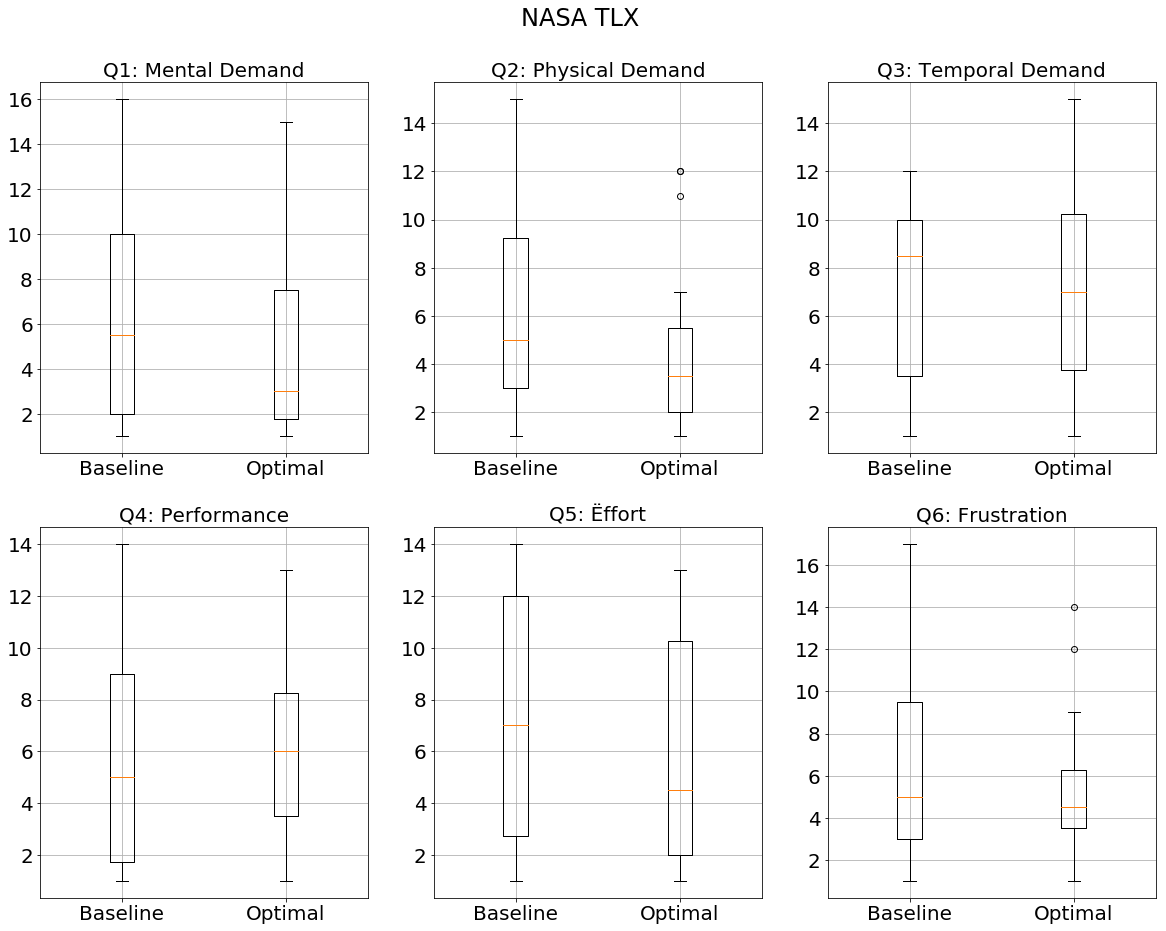

In [53]:
# boxPlots per Question
questions = ["Mental Demand", "Physical Demand", "Temporal Demand", "Performance", "Effort", "Frustration"]
idx = 0  
idy = 0
print(np.shape(resultsPhase2Baseline))
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(20,15))
fig.suptitle("NASA TLX", y = 0.95)
for i in range (1, 7):
    base = resultsPhase2Baseline[:,i]
    optimal = resultsPhase2Optimal[:,i]
    axs[idx][idy].boxplot([ base, optimal], labels= ["Baseline", "Optimal"])
    axs[idx][idy].set_title('Q'+str(i) + ": " + questions[i-1])
    axs[idx][idy].grid(True)
    idy += 1
    if (idy == 3):
        idy = 0
        idx +=1
plt.show()